# Cost Function

In [1]:
#import the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

## Creating sample Data

In [2]:
# creating the sample dataset
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary     = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({ "salary" : salary, "experience" : experience })
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


## Plotting th data

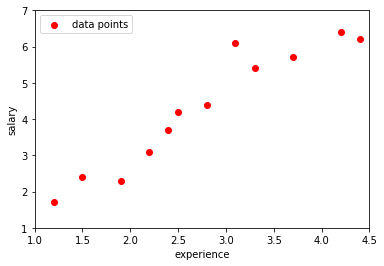

In [3]:
plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

## Starting the Line using small values of parameters

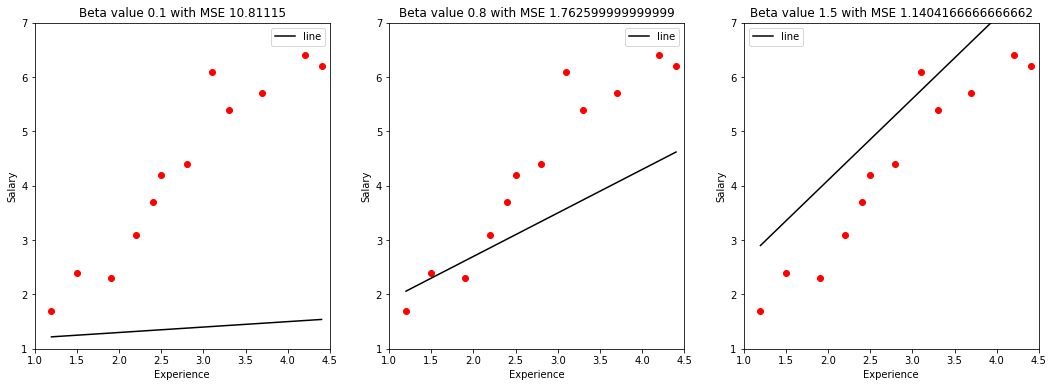

In [4]:
# making lines for different Values of Beta 0.1, 0.8, 1.5
beta = [0.1, 0.8, 1.5]

# keeping intercept constant
b = 1.1

def plot(beta):
    # to store predicted points
    line = []

    # generating predictions for every data point
    for i in range(len(data)):
        line.append(data.experience[i]*beta + b)

    # Plotting the line
    plt.scatter(data.experience, data.salary, color = 'red')
    plt.plot(data.experience, line, color = 'black', label = 'line')
    plt.xlim(1,4.5)
    plt.ylim(1,7)
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.legend()
    MSE = mse(data.salary, line)
    plt.title("Beta value "+str(beta)+" with MSE "+ str(MSE))

plt.figure(figsize=(18,6))
for i in range(1,4):
    plt.subplot(1,3,i)
    plot(beta[i-1])

## Computing Cost over a range of values of Beta

In [5]:
def Error(Beta, data):
    
  # b is constant
    b = 1.1
  
    salary = []
  
  # Loop to calculate predict salary variables
    for i in range(len(data.experience)):
        tmp = data.experience[i] * Beta + b
        salary.append(tmp)
    MSE = mse(data.salary, salary)
    return MSE

In [6]:
# Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, data = data)
    Cost.append(cost)

In [7]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : Cost
})
Cost_table.head()

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824


## Visualising cost with respect to Beta

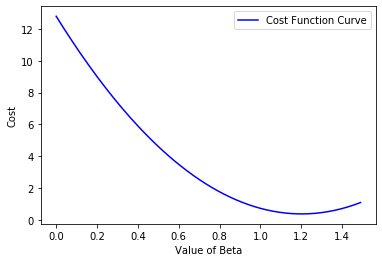

In [8]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()